## KNN 모델을 통한 학습 및 평가(스케일링 없는 버전)

[[554  44]
 [ 76 126]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       598
           1       0.74      0.62      0.68       202

    accuracy                           0.85       800
   macro avg       0.81      0.78      0.79       800
weighted avg       0.84      0.85      0.85       800

모델 정확도: 0.8500


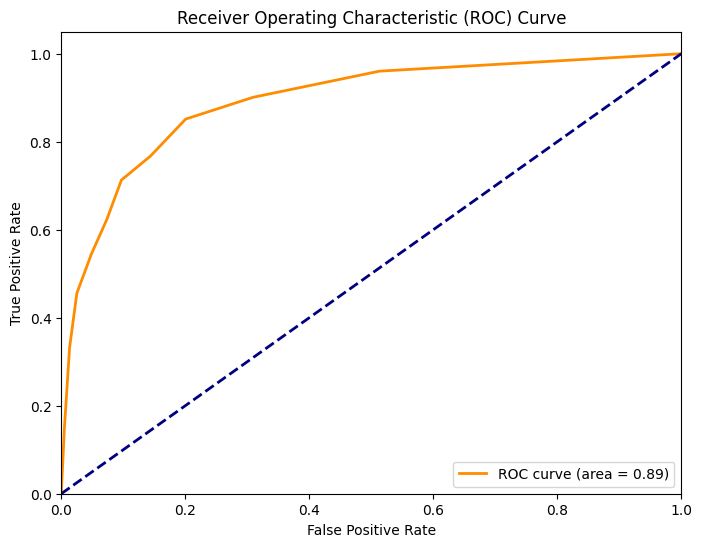

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,roc_curve,auc
import matplotlib.pyplot as plt


health_df = pd.read_csv('../data/gym_churn_us.csv')

X = health_df.drop('Churn', axis=1)  
y = health_df['Churn']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 회원정보를 기반한 회원 이탈 예측 

In [2]:
# gender,
# Near_Location,
# Partner,Promo_friends,
# Phone,Contract_period,
# Group_visits,
# ge,Avg_additional_charges_total,
# Month_to_end_contract,
# Lifetime,
# Avg_class_frequency_total,
# Avg_class_frequency_current_month,
# Churn
# 0,1,0,0,1,12,1,31,113.20293765105819,12.0,7,1.9229360550418195,1.9102435215196407,0
# 1,1,1,0,1,1,0,27,266.7838237446521,1.0,2,2.3485353357599856,1.5843158272716689,1

# new_data = pd.DataFrame({
#     'gender': [0],
#     'Near_Location': [1],
#     'Partner': [0],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [12],
#     'Group_visits': [1],
#     'Age': [31],
#     'Avg_additional_charges_total': [113.20293765105819],
#     'Month_to_end_contract': [12.0],
#     'Lifetime': [7], 
#     'Avg_class_frequency_total': [1.9229360550418195],
#     'Avg_class_frequency_current_month': [0.9102435215196407]
# }, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [1],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [27],
#     'Avg_additional_charges_total': [226.7838237446521],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [2], 
#     'Avg_class_frequency_total': [2.3485353357599856],
#     'Avg_class_frequency_current_month': [1.5843158272716689]
# }, index=[0])

new_data = pd.DataFrame({
    'gender': [1],
    'Near_Location': [1],
    'Partner': [0],
    'Promo_friends': [0],
    'Phone': [1],
    'Contract_period': [1],
    'Group_visits': [0],
    'Age': [28],
    'Avg_additional_charges_total': [42.160809042705715],
    'Month_to_end_contract': [1.0],
    'Lifetime': [1], 
    'Avg_class_frequency_total': [0.4250114097298257],
    'Avg_class_frequency_current_month': [0.6052465413331591]
}, index=[0])

prediction = knn.predict(new_data)
print(f"예측된 결과: {'나갈 회원' if prediction[0] == 1 else '남을 회원'}")


예측된 결과: 나갈 회원


## KNN 모델을 통한 학습 및 평가(스케일링 버전)

[[561  37]
 [ 60 142]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       598
           1       0.79      0.70      0.75       202

    accuracy                           0.88       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.88      0.88      0.88       800

모델 정확도: 0.8788


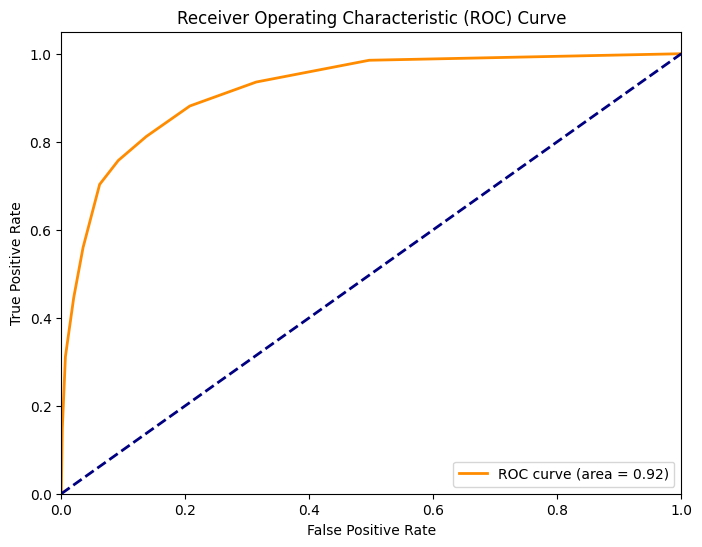

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc
import matplotlib.pyplot as plt

health_df = pd.read_csv('../data/gym_churn_us.csv')

X = health_df.drop('Churn', axis=1)  
y = health_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

y_prob = knn.predict_proba(X_test_scaled)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




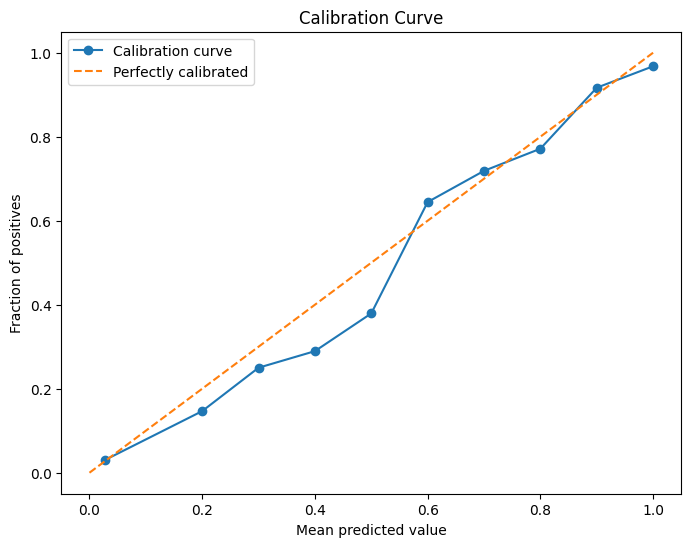

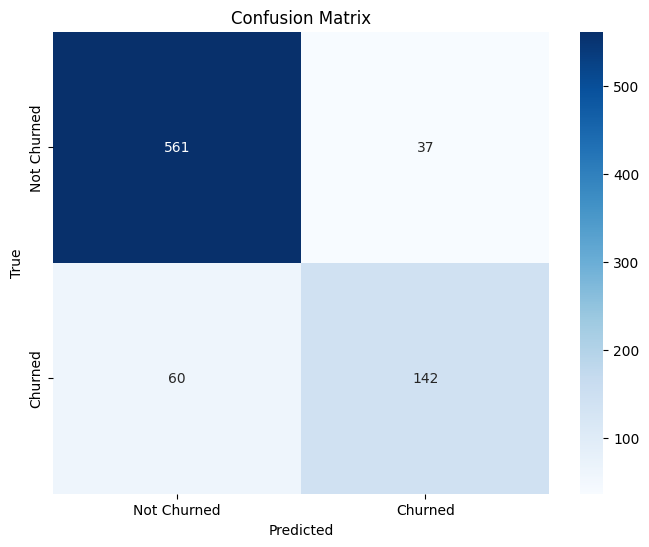

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Calibration Curve
# -----------------------
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# -----------------------
# Confusion Matrix Visualization
# -----------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 회원정보를 기반한 회원 이탈 예측 

In [6]:
# gender,
# Near_Location,
# Partner,Promo_friends,
# Phone,Contract_period,
# Group_visits,
# ge,Avg_additional_charges_total,
# Month_to_end_contract,
# Lifetime,
# Avg_class_frequency_total,
# Avg_class_frequency_current_month,
# Churn
# 0,1,0,0,1,12,1,31,113.20293765105819,12.0,7,1.9229360550418195,1.9102435215196407,0
# 1,1,1,0,1,1,0,27,266.7838237446521,1.0,2,2.3485353357599856,1.5843158272716689,1
# 1,1,0,0,1,1,0,28,42.160809042705715,1.0,1,0.4250114097298257,0.6052465413331591,1

# new_data = pd.DataFrame({
#     'gender': [0],
#     'Near_Location': [1],
#     'Partner': [0],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [12],
#     'Group_visits': [1],
#     'Age': [31],
#     'Avg_additional_charges_total': [113.20293765105819],
#     'Month_to_end_contract': [12.0],
#     'Lifetime': [7], 
#     'Avg_class_frequency_total': [1.9229360550418195],
#     'Avg_class_frequency_current_month': [0.9102435215196407]
# }, index=[0])
new_data = pd.DataFrame({
    'gender': [1],
    'Near_Location': [1],
    'Partner': [0],
    'Promo_friends': [0],
    'Phone': [1],
    'Contract_period': [1],
    'Group_visits': [0],
    'Age': [28],
    'Avg_additional_charges_total': [42.160809042705715],
    'Month_to_end_contract': [1.0],
    'Lifetime': [1], 
    'Avg_class_frequency_total': [0.4250114097298257],
    'Avg_class_frequency_current_month': [0.6052465413331591]
}, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [1],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [27],
#     'Avg_additional_charges_total': [226.7838237446521],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [2], 
#     'Avg_class_frequency_total': [2.3485353357599856],
#     'Avg_class_frequency_current_month': [1.5843158272716689]
# }, index=[0])
# new_data_scaled = scaler.transform(new_data)

prediction = knn.predict(new_data)
print(f"예측된 결과: {'나갈 회원' if prediction[0] == 1 else '남을 회원'}")


예측된 결과: 남을 회원


c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
